## Grupo 7

   #### Participantes na primeira entrega:
       Lucas Santos de Oliveira
       Lucas Madaloni Meira Varella
       Nathan Sargon Werlich
       Sadi Júnior Domingos Jacinto
        
   #### Participantes na segunda entrega:
       Sadi Júnior Domingos Jacinto

### Entendimento dos Dados (_Data Understanding_)

1. Coleta inicial dos dados:
  - Foi utilizado o _dataset_ _owid-covid-data.csv_, contido no repositório [https://github.com/owid/covid-19-data](https://github.com/owid/covid-19-data), que pode ser encontrado nesse [_link_](https://covid.ourworldindata.org/data/owid-covid-data.csv).

2. Descrição dos Dados:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Para garantir que o presente notebook seja funcional mesmo estando offline, foi adicionado o dataset em anexo.
# Caso queira utilizar o dataset on-line, descomente a linha abaixo e depois comente a última linha dessa cédula
# data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
data = pd.read_csv('owid-covid-data.csv')

Vamos iniciar analisando quais são os tipos de dados disponíveis, sua quantidade, a correlação entre as variáveis e uma breve visualização humana também.

In [3]:
data.shape

(116345, 62)

In [4]:
# Por existirem muitas colunas, é necessário configurar o pandas para exibir todas.
pd.set_option('max_column', None)
pd.set_option('max_row', None)

In [5]:
data.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [6]:
data.head(15)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,0.0,0.126,0.000,0.018,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,0.0,0.126,0.000,0.018,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,0.0,0.126,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,0.0,0.126,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
9,AFG,Asia,Afghanistan,2020-03-

Aqui percebemos algumas coisas interessantes:

- O atributo _date_, é uma data no formato yyyy-mm-dd, mas está sendo interpretado pelo pandas como um object ou, mais precisamente, uma str. Logo de cara encontramos uma necessidade de transformação de tipos.
- Existe uma quantidade muito grande de valores NaN, que devem ser tratados, seja por inferência ou remoção.
- Existem diversos valores numéricos, como _population_ que deveriam ser inteiros mas estão sendo interpretados como _float_.

In [7]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,1.106710e+05,110668.000000,109653.000000,1.000310e+05,100186.000000,109653.000000,110087.000000,110084.000000,109074.000000,99460.000000,99615.000000,109074.000000,93324.000000,12631.000000,12631.000000,15095.000000,15095.000000,1143.000000,1143.000000,2029.000000,2029.000000,5.048000e+04,5.031600e+04,50316.000000,50480.000000,5.974200e+04,59742.000000,56510.000000,55891.000000,2.515700e+04,2.408300e+04,2.115600e+04,1.741000e+03,2.080500e+04,4.502600e+04,25157.000000,24083.000000,21156.000000,1741.000000,45026.000000,95552.000000,1.155470e+05,107586.000000,102868.000000,101722.000000,102303.000000,103451.000000,69495.000000,103178.000000,106277.000000,80591.000000,79419.000000,51831.000000,93848.000000,110366.000000,103271.000000,4003.000000
mean,1.346912e+06,6415.010147,6430.439521,3.464710e+04,145.988342,132.683484,16600.781955,81.256433,81.257975,351.938997,1.539385,1.396322,1.009396,973.475022,23.332550,4267.125406,151.028037,227.206160,17.490430,3146.181647,92.782047,5.277479e+04,9.834391e+06,409.519252,2.353112,4.966660e+04,2.247727,0.087723,161.598588,5.972713e+07,3.177242e+07,1.885911e+07,1.099207e+06,8.203777e+05,3.875657e+05,39.679948,24.116904,17.795976,1.391683,3499.441856,57.432765,1.231060e+08,394.553102,30.530340,8.768934,5.549103,19260.017398,13.463554,259.101507,7.999572,10.596332,32.731020,50.758012,3.024735,73.257311,0.726688,18.064269
std,9.054313e+06,39302.112314,38862.226351,2.066359e+05,796.431790,744.013341,28781.771112,189.249730,161.015268,605.934248,3.938527,2.976712,0.349514,2903.722282,25.667648,11754.905686,198.663491,514.361681,32.344065,10578.800794,192.032960,1.872264e+05,4.171693e+07,990.776430,6.491336,1.690996e+05,5.477899,0.097065,859.365602,3.353234e+08,1.818993e+08,1.104265e+08,2.831026e+06,3.806190e+06,2.560945e+06,42.564193,23.344548,20.245962,3.982137,4431.332030,20.818174,6.784994e+08,1836.378800,9.126435,6.197136,4.226250,20043.121725,19.977660,119.273122,4.256142,10.506143,13.498893,31.754252,2.453977,7.545214,0.150257,35.095659
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.001000,-75.911000,-10.844000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.813000e+03,3.000000,8.714000,6.400000e+01,0.000000,0.000000,319.343000,0.271000,1.482000,9.704000,0.000000,0.000000,0.840000,29.000000,3.862000,104.000000,20.275000,5.991500,1.505000,38.000000,8.590000,

In [8]:
data.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
total_cases,1.000000,0.841139,0.855721,0.987031,0.801344,0.824160,0.116078,0.040121,0.047991,0.135552,0.038803,0.057069,-0.000773,0.732400,0.153693,0.673820,0.043003,0.462695,0.089747,0.705055,0.056001,0.791013,0.959444,0.071854,0.026479,0.815990,0.029247,-0.000627,-0.035257,0.770441,0.810747,0.744066,0.395902,0.794059,0.806449,0.018342,0.011000,-0.025673,-0.229584,0.034932,0.057385,0.650903,-0.016004,0.031961,0.028684,0.025523,0.015561,-0.034500,-0.036162,0.018925,-0.003276,-0.009386,0.032367,-0.007853,0.020649,0.035833,0.041016
new_cases,0.841139,1.000000,0.986818,0.844859,0.930226,0.923645,0.063394,0.086255,0.086617,0.079232,0.070525,0.086370,0.014689,0.899587,0.285607,0.880328,0.161855,0.618938,0.189780,0.856577,0.148640,0.740027,0.596569,0.016925,0.019725,0.736391,0.019087,0.103973,-0.038604,0.576818,0.595564,0.561961,0.314374,0.651034,0.650298,-0.057878,-0.073650,-0.087493,-0.206163,-0.008548,0.095572,0.730174,-0.017777,0.033660,0.029026,0.025508,0.013198,-0.037817,-0.038708,0.020512,-0.008363,-0.007619,0.038435,-0.010132,0.021542,0.037389,0.142799
new_cases_smoothed,0.855721,0.986818,1.000000,0.858381,0.925148,0.941069,0.065075,0.074443,0.088158,0.081761,0.066709,0.089949,0.010497,0.952187,0.303519,0.929218,0.172330,0.722085,0.257850,0.943959,0.159574,0.750305,0.610483,0.017192,0.018674,0.761264,0.019995,0.105541,-0.039439,0.585822,0.604134,0.573084,0.323573,0.654569,0.660883,-0.059032,-0.074818,-0.089644,-0.210021,-0.007774,0.098282,0.740293,-0.018000,0.034022,0.029327,0.025770,0.013261,-0.038199,-0.039158,0.020804,-0.008462,-0.007811,0.038754,-0.010301,0.021748,0.037770,0.128799
total_deaths,0.987031,0.844859,0.858381,1.000000,0.826282,0.849219,0.109636,0.035010,0.041772,0.166770,0.052788,0.069199,-0.001579,0.741679,0.149380,0.697378,0.052085,0.477221,0.038008,0.707570,0.046037,0.723041,0.871765,0.051743,0.011719,0.743699,0.011862,0.050932,-0.045792,0.726539,0.767333,0.710015,0.337302,0.750314,0.763214,0.009194,0.004533,-0.032287,-0.236178,0.032703,0.061682,0.659944,-0.019532,0.032419,0.028326,0.025687,0.009462,-0.041386,-0.042567,0.024470,-0.005972,-0.007304,0.039848,-0.010333,0.023461,0.037939,0.154679
new_deaths,0.801344,0.930226,0.925148,0.826282,1.000000,0.977264,0.045870,0.061319,0.065333,0.093094,0.121397,0.127268,0.002909,0.863598,0.348105,0.883836,0.251515,0.620762,0.315363,0.828629,0.212758,0.665195,0.507139,-0.023740,-0.007295,0.644687,-0.012914,0.190795,-0.049751,0.510049,0.530287,0.479124,0.222141,0.610070,0.609505,-0.093219,-0.106995,-0.126283,-0.203437,-0.017714,0.130482,0.745172,-0.021752,0.031528,0.024239,0.020944,0.002291,-0.044673,-0.039783,0.027536,-0.013937,-0.000868,0.046910,-0.012410,0.020713,0.036188,0.418981
new_deaths_smoothed,0.824160,0.923645,0.941069,0.849219,0.977264,1.000000,0.056766,0.058785,0.071772,0.097550,0.101981,0.137135,0.00

<AxesSubplot:>

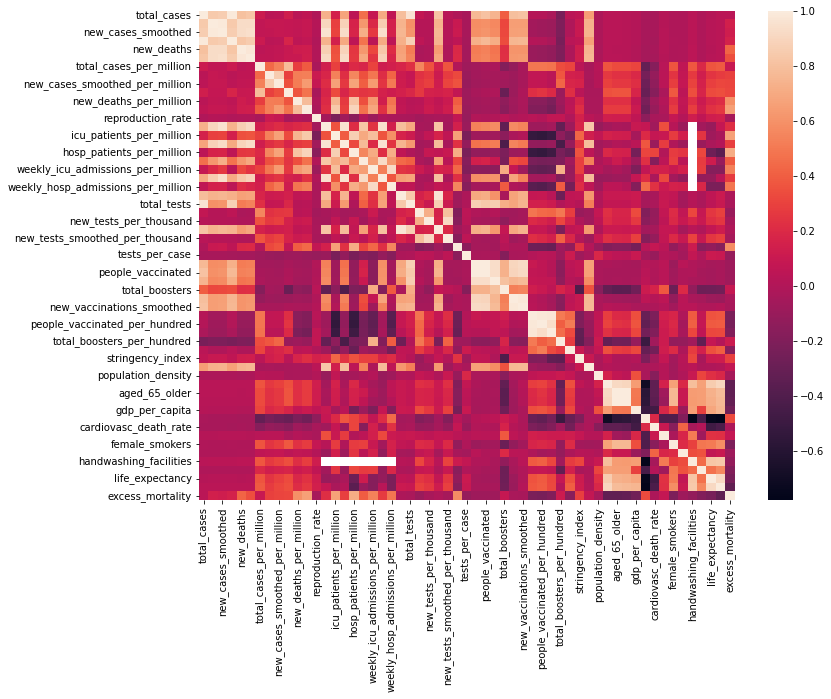

In [9]:
plt.figure(figsize=(12, 9))
sns.heatmap(data.corr(), annot=False)

Como deve ter ficado claro na análise de correlação entre as variáveis nas duas células acima, o número de atributos é grande o suficiente para dificultar a visualização e análise dos mesmos. Vamos, então, analisar a descrição oficial de cada um desses atributos, acessível nesse [link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

Por se tratar de uma atividade bastante extensa, e para não lotar esse notebook de informações textuais que ninguém vai ler de fato, essa etapa não será detalhada.

Após ser realizado o estudo do significado de cada um dos atributos, devemos verificar a qualidade dos mesmos, à saber:
- Valores faltantes ou nulos
- Valores duplicados

In [10]:
data.isna().sum()

iso_code                                      0
continent                                  5326
location                                      0
date                                          0
total_cases                                5674
new_cases                                  5677
new_cases_smoothed                         6692
total_deaths                              16314
new_deaths                                16159
new_deaths_smoothed                        6692
total_cases_per_million                    6258
new_cases_per_million                      6261
new_cases_smoothed_per_million             7271
total_deaths_per_million                  16885
new_deaths_per_million                    16730
new_deaths_smoothed_per_million            7271
reproduction_rate                         23021
icu_patients                             103714
icu_patients_per_million                 103714
hosp_patients                            101250
hosp_patients_per_million               

Uma visualização gráfica desses dados nulos pode ser feita usando a biblioteca missingno.

<AxesSubplot:>

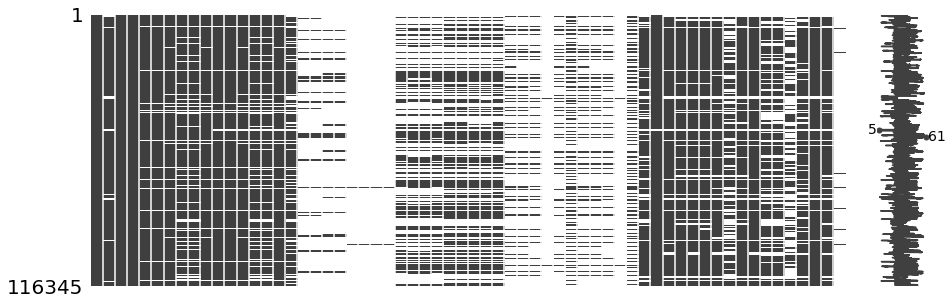

In [11]:
import missingno as msno
msno.matrix(data, figsize=(15, 5))

In [12]:
data.duplicated().sum()

0

### Preparação de Dados (_Data Preparation_)

1. Seleção de Dados:  
De forma resumida, as colunas que nos interessam são:
  - iso_code: Sigla do País
  - continent: continente do país
  - location: nome do país
  - date: data do registro
  - total_cases: número total de casos confirmados de COVID-19
  - new_cases: novos casos confirmados de COVID-19
  - new_cases_smoothed: novos casos confirmados de COVID-19 (com suavização de 7 dias)
  - total_deaths: mortes confirmadas por COVID-19
  - new_deaths: novas mortes confirmadas por COVID-19
  - new_deaths_smoothed: novas mortes confirmadas por COVID-19 (com suavização de 7 dias)
  - total_cases_per_million: número total de casos confirmados de COVID-19 por milhão
  - new_cases_per_million: novos casos confirmados de COVID-19 por milhão
  - new_cases_smoothed_per_million: novos casos confirmados de COVID-19 por milhão (com suavização de 7 dias)
  - total_deaths_per_million: mortes confirmadas por COVID-19 por milhão
  - new_deaths_per_million: novas mortes confirmadas por COVID-19 por milhão
  - new_deaths_smoothed_per_million: novas mortes confirmadas por COVID-19 por milhão (com suavização de 7 dias)
  - reproduction_rate: taxa de reprodução do vírus
  - hosp_patients: Número de pacientes em um hospital com COVID-19 na data
  - hosp_patients_per_million: Número de pacientes em um hospital com COVID-19 na data por milhão
  - weekly_hosp_admissions: número de pacientes com COVID-19 admitidos em hospitais por semana.
  - weekly_hosp_admissions_per_million: número de pacientes com COVID-19 admitidos em hospitais por semana por milhão.
  - new_tests: novos testes de COVID-19
  - total_tests: total de testes de COVID-19
  - total_tests_per_thousand: total de testes de COVID-19 a cada 1000 pessoas
  - new_tests_per_thousand: novos testes de COVID-19 a cada 1000 pessoas
  - new_tests_smoothed: novos testes de COVID-19 com suavização de 7 dias
  - new_tests_smoothed_per_thousand: novos testes de COVID-19 com suavização de 7 dias a cada 1000 pessoas
  - positive_rate: taxa de positivação dos testes
  - total_vaccinations: total de vacinas aplicadas
  - people_vaccinated: total de pessoas que receberam ao menos uma dose da vacina
  - people_fully_vaccinated: total de pessoas que receberam todas as doses da vacina
  - new_vaccinations: novas vacinas aplicadas
  - new_vaccinations_smoothed: novas vacinas aplicadas por semana.
  - total_vaccinations_per_hundred: total de vacinas a cada 100 pessoas
  - people_vaccinated_per_hundred: total de pessoas que tomaram ao menos uma dose a cada 100 pessoas
  - people_fully_vaccinated_per_hundred: total de pessoas que tomaram todas as doses a cada 100 pessoas
  - new_vaccinations_smoothed_per_million: novas vacinações aplicadas por semana a cada 1 milhão de pessoas
  - population: população do país em 2020
  - median_age: média da idade da população em 2020
  - aged_65_older: porcentagem da população com mais de 65 anos
  - aged_70_older: porcentagem da população com mais de 70 anos
  - gdp_per_capita: poder de compra da população usando o valor do dolar em 2011.
  - extreme_poverty: porcentagem da população vivendo em extrema pobreza.
  - female_smokers: porcentagem de mulheres fumantes na população
  - male_smokers: porcentagem de homens fumantes na população
  - handwashing_facilities: porcentagem da população com acesso à "lavar as mãos"
  - hospital_beds_per_thousand: vagas no hospital por 1000 pessoas 
  - life_expectancy: expectativa de vida da população do país
  - human_development_index: IDH do país

Com os atributos selecionados, precisamos, agora, criar um novo Dataframe apenas com esses atributos e refazer nossa análise inicial dos dados:

In [13]:
attributes = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
              'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
              'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million',
              'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate',
              'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 
              'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand',
              'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
              'positive_rate', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
              'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
              'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
              'new_vaccinations_smoothed_per_million', 'population', 'median_age', 'aged_65_older',
              'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'female_smokers', 'male_smokers',
              'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index']

dataset = data[attributes].copy()
del data

In [14]:
dataset.shape

(116345, 49)

<AxesSubplot:>

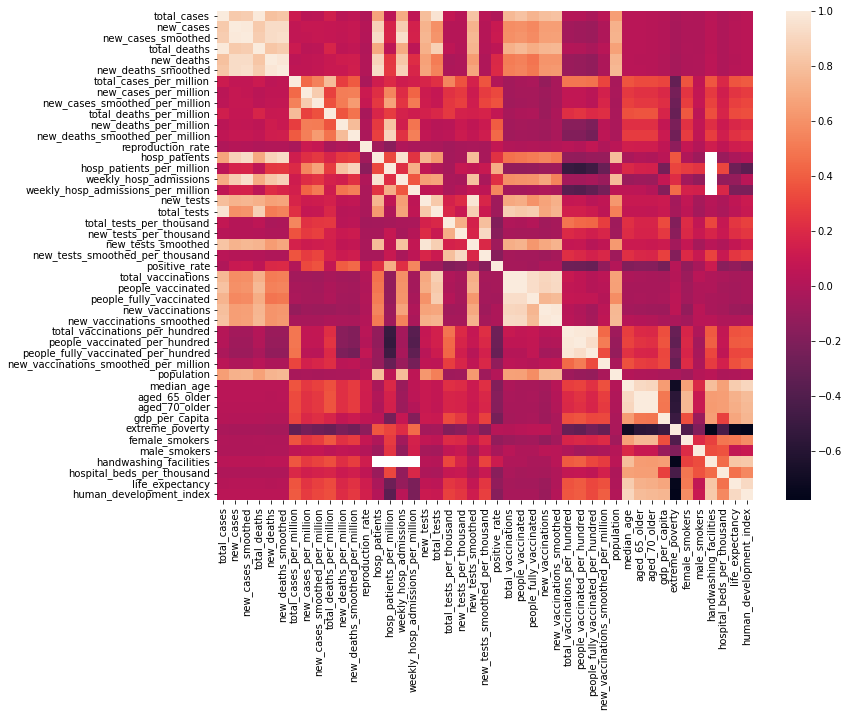

In [15]:
plt.figure(figsize=(12, 9))
sns.heatmap(dataset.corr(), annot=False)

<AxesSubplot:>

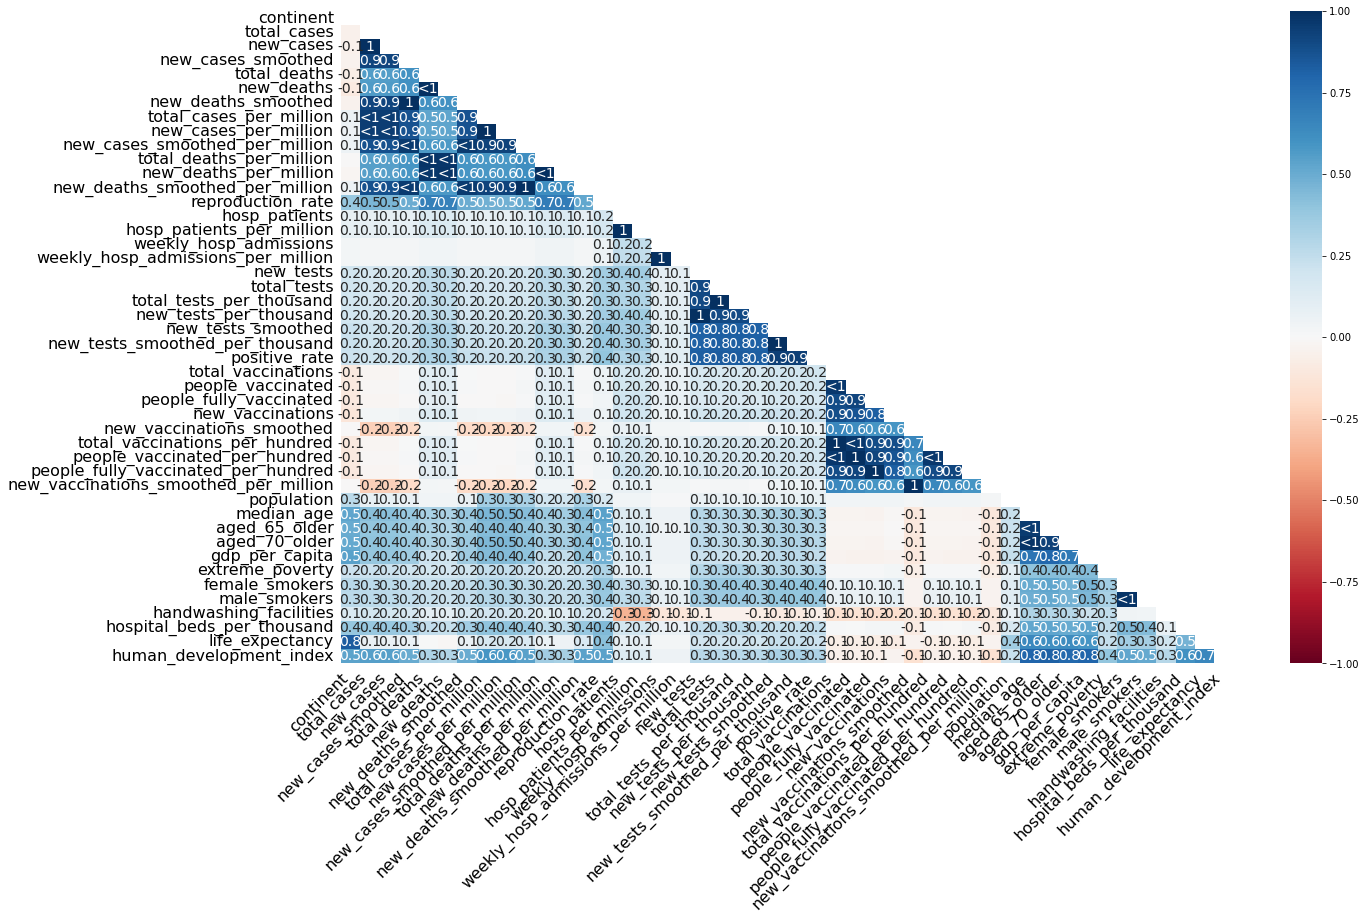

In [16]:
msno.heatmap(dataset)

In [17]:
dataset.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.841139,0.855721,0.987031,0.801344,0.824160,0.116078,0.040121,0.047991,0.135552,0.038803,0.057069,-0.000773,0.673820,0.043003,0.705055,0.056001,0.791013,0.959444,0.071854,0.026479,0.815990,0.029247,-0.000627,0.770441,0.810747,0.744066,0.794059,0.806449,0.018342,0.011000,-0.025673,0.034932,0.650903,0.031961,0.028684,0.025523,0.015561,-0.034500,-0.003276,-0.009386,0.032367,-0.007853,0.020649,0.035833
new_cases,0.841139,1.000000,0.986818,0.844859,0.930226,0.923645,0.063394,0.086255,0.086617,0.079232,0.070525,0.086370,0.014689,0.880328,0.161855,0.856577,0.148640,0.740027,0.596569,0.016925,0.019725,0.736391,0.019087,0.103973,0.576818,0.595564,0.561961,0.651034,0.650298,-0.057878,-0.073650,-0.087493,-0.008548,0.730174,0.033660,0.029026,0.025508,0.013198,-0.037817,-0.008363,-0.007619,0.038435,-0.010132,0.021542,0.037389
new_cases_smoothed,0.855721,0.986818,1.000000,0.858381,0.925148,0.941069,0.065075,0.074443,0.088158,0.081761,0.066709,0.089949,0.010497,0.929218,0.172330,0.943959,0.159574,0.750305,0.610483,0.017192,0.018674,0.761264,0.019995,0.105541,0.585822,0.604134,0.573084,0.654569,0.660883,-0.059032,-0.074818,-0.089644,-0.007774,0.740293,0.034022,0.029327,0.025770,0.013261,-0.038199,-0.008462,-0.007811,0.038754,-0.010301,0.021748,0.037770
total_deaths,0.987031,0.844859,0.858381,1.000000,0.826282,0.849219,0.109636,0.035010,0.041772,0.166770,0.052788,0.069199,-0.001579,0.697378,0.052085,0.707570,0.046037,0.723041,0.871765,0.051743,0.011719,0.743699,0.011862,0.050932,0.726539,0.767333,0.710015,0.750314,0.763214,0.009194,0.004533,-0.032287,0.032703,0.659944,0.032419,0.028326,0.025687,0.009462,-0.041386,-0.005972,-0.007304,0.039848,-0.010333,0.023461,0.037939
new_deaths,0.801344,0.930226,0.925148,0.826282,1.000000,0.977264,0.045870,0.061319,0.065333,0.093094,0.121397,0.127268,0.002909,0.883836,0.251515,0.828629,0.212758,0.665195,0.507139,-0.023740,-0.007295,0.644687,-0.012914,0.190795,0.510049,0.530287,0.479124,0.610070,0.609505,-0.093219,-0.106995,-0.126283,-0.017714,0.745172,0.031528,0.024239,0.020944,0.002291,-0.044673,-0.013937,-0.000868,0.046910,-0.012410,0.020713,0.036188
new_deaths_smoothed,0.824160,0.923645,0.941069,0.849219,0.977264,1.000000,0.056766,0.058785,0.071772,0.097550,0.101981,0.137135,0.001742,0.929153,0.263454,0.879497,0.179788,0.676847,0.537686,-0.020549,-0.008683,0.681779,-0.010533,0.195739,0.525143,0.546230,0.494380,0.620656,0.627347,-0.094048,-0.107695,-0.128696,-0.016173,0.763212,0.034555,0.027909,0.024544,0.006214,-0.045472,-0.011999,-0.005573,0.044925,-0.011202,0.022292,0.038643
total_cases_per_million,0.116078,0.063394,0.065075,0.109636,0.045870,0.056766,1.000000,0.440865,0.529550,0.781583,0.284055,0.385917,-0.029475,0.125002,0.195684,0.123257,0.141426,0.169299,0.225105,0.550538,0.357621,0.156113,0.367394,0.005590,-0.057495,-0.035705,-0.025209,-0.117235,-0.038258,0.489272,0.491342,0.476433,0.310290,-0.039392,0.365686,0.332387,0.331489,0.307365,-0.314962,0.365055,0.059610,0.371511,0.187545,0.363765,0.386497
new_cases_per_million,0.040121,0.086255,0.074443,0.035010,0.06131

Vamos, primeiro, tratar dos poucos valores categóricos que temos:

In [18]:
dataset['iso_code'].unique()

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
       'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FRO',
       'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GNB',
       'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'OWID_INT',
       'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY',
       'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA',
       'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG

Precisamos converter os valores iniciados com "OWID" para o formato aceitado de apenas três letras. E depois remover as linhas que pertencem a países que não existem.

In [19]:
dataset['iso_code'] = dataset['iso_code'].replace({'OWID_AFR': 'AFR', 'OWID_ASI': 'ASI', 'OWID_EUR': 'EUR',
                                           'OWID_EUN': 'EUN', 'OWID_INT': 'INT', 'OWID_KOS': 'KOS',
                                           'OWID_NAM': 'NAM', 'OWID_CYN': 'CYN', 'OWID_OCE': 'OCE',
                                           'OWID_SAM': 'SAM', 'OWID_WRL': 'WRL'})

In [20]:
import pycountry_convert as pc
from iso3166 import countries

In [21]:
not_find = []

for country in dataset['iso_code'].unique():
    try:
        #print(f'Working in country {country}')
        countries.get(country)
    except:
        print(f'Can not find country {country}')
        not_find.append(country)

mask = dataset['iso_code'].isin(not_find)
dataset = dataset[~mask]

Can not find country AFR
Can not find country ASI
Can not find country EUR
Can not find country EUN
Can not find country INT
Can not find country KOS
Can not find country CYN
Can not find country OCE
Can not find country SAM
Can not find country WRL


In [22]:
uniques = set()
def verify_geography(x):
    iso_code = x['iso_code']
    country = countries.get(iso_code)
    country_name = country.name
    try:
        alpha2 = country.alpha2
        continent_code = pc.country_alpha2_to_continent_code(alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        if x['continent'] == '' or x['continent'] != continent_name:
            #print(f"continent name in database is {x['continent']} and real value is {continent_name}")
            x['continent'] = continent_name
        if x['location'] != country_name:
            #print(f"Location name in database is {x['location']} and real value is {country_name}")
            x['location'] = country_name
        return x
    except:
        uniques.add(f'O que está dando erro é o {iso_code}')
        #traceback.print_exc()

In [23]:
dataset = dataset.apply(lambda x: verify_geography(x), axis=1)

In [24]:
uniques

{'O que está dando erro é o PCN',
 'O que está dando erro é o SXM',
 'O que está dando erro é o TLS',
 'O que está dando erro é o VAT'}

In [25]:
dataset[dataset['iso_code'].isin(['PCN', 'SXM', 'TLS', 'VAT'])]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index


Por se tratarem de poucos dados, e a maioria com valores NaN, não há problema em os remover.

Vamos, agora, converter a data para datetime

In [26]:
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
dataset.dtypes

iso_code                                         object
continent                                        object
location                                         object
date                                     datetime64[ns]
total_cases                                     float64
new_cases                                       float64
new_cases_smoothed                              float64
total_deaths                                    float64
new_deaths                                      float64
new_deaths_smoothed                             float64
total_cases_per_million                         float64
new_cases_per_million                           float64
new_cases_smoothed_per_million                  float64
total_deaths_per_million                        float64
new_deaths_per_million                          float64
new_deaths_smoothed_per_million                 float64
reproduction_rate                               float64
hosp_patients                                   

In [27]:
dataset.date.describe(datetime_is_numeric=True)

count                           109549
mean     2020-12-14 23:13:27.255201024
min                2020-01-01 00:00:00
25%                2020-07-27 00:00:00
50%                2020-12-22 00:00:00
75%                2021-05-07 00:00:00
max                2021-09-12 00:00:00
Name: date, dtype: object

Vamos, finalmente, tratar dos dados nulos.

In [28]:
dataset.isna().sum()

iso_code                                   1308
continent                                  1308
location                                   1308
date                                       1308
total_cases                                6551
new_cases                                  6559
new_cases_smoothed                         7512
total_deaths                              16119
new_deaths                                16083
new_deaths_smoothed                        7512
total_cases_per_million                    6551
new_cases_per_million                      6559
new_cases_smoothed_per_million             7512
total_deaths_per_million                  16119
new_deaths_per_million                    16083
new_deaths_smoothed_per_million            7512
reproduction_rate                         18863
hosp_patients                             95762
hosp_patients_per_million                 95762
weekly_hosp_admissions                   108828
weekly_hosp_admissions_per_million      

Como existem diversos valores nulos, vamos dropar as linhas que possuem todos os dados nulos.

In [29]:
dataset = dataset.dropna(how='all')

In [30]:
print(dataset.isna().sum())
dataset.shape

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                5243
new_cases                                  5251
new_cases_smoothed                         6204
total_deaths                              14811
new_deaths                                14775
new_deaths_smoothed                        6204
total_cases_per_million                    5243
new_cases_per_million                      5251
new_cases_smoothed_per_million             6204
total_deaths_per_million                  14811
new_deaths_per_million                    14775
new_deaths_smoothed_per_million            6204
reproduction_rate                         17555
hosp_patients                             94454
hosp_patients_per_million                 94454
weekly_hosp_admissions                   107520
weekly_hosp_admissions_per_million      

(109549, 49)

Como ainda sobraram muitos dados nulos, vamos agora dropar todas as linhas que possuam 39 ou mais atributos nulos, já que uma linha com essa quantidade de atributos nulos não somente não será útil, como será extremamente, se não impossível, de inferir.

Embora, ainda estejamos analisando essa situação.

In [31]:
dataset = dataset.dropna(thresh=39)

In [32]:
print(dataset.isna().sum())
dataset.shape

iso_code                                     0
continent                                    0
location                                     0
date                                         0
total_cases                                  0
new_cases                                    1
new_cases_smoothed                           0
total_deaths                                 0
new_deaths                                   1
new_deaths_smoothed                          0
total_cases_per_million                      0
new_cases_per_million                        1
new_cases_smoothed_per_million               0
total_deaths_per_million                     0
new_deaths_per_million                       1
new_deaths_smoothed_per_million              0
reproduction_rate                           55
hosp_patients                             9977
hosp_patients_per_million                 9977
weekly_hosp_admissions                   15577
weekly_hosp_admissions_per_million       15577
new_tests    

(17000, 49)

Grande parte do _dataset_, como é possível perceber, foi removido. O que significa que esse _dataset_ escolhido é bastante "poluído". Porém, a quantidade restante ainda é o suficiente para diversas análises. E, como o número de dados nulos reduziu significativamente, fica mais fácil análisar e tratar os que restaram.

Percebemos que o valor de dados faltantes nos atributos _weekly_hosp_admissions_ e _weekly_hosp_admissions_per_million_ eram próximos ao tamanho total do _dataset_, por isso, removemos essas colunas.

In [33]:
dataset.drop(['weekly_hosp_admissions', 'weekly_hosp_admissions_per_million'], inplace=True, axis=1)

In [34]:
print(dataset.isna().sum())
dataset.shape

iso_code                                     0
continent                                    0
location                                     0
date                                         0
total_cases                                  0
new_cases                                    1
new_cases_smoothed                           0
total_deaths                                 0
new_deaths                                   1
new_deaths_smoothed                          0
total_cases_per_million                      0
new_cases_per_million                        1
new_cases_smoothed_per_million               0
total_deaths_per_million                     0
new_deaths_per_million                       1
new_deaths_smoothed_per_million              0
reproduction_rate                           55
hosp_patients                             9977
hosp_patients_per_million                 9977
new_tests                                 1801
total_tests                               1711
total_tests_p

(17000, 47)

Após analisar os atributos separadamente, decidimos atrubuir os valores faltantes através da média daquele atributo, naquele país e naquele mês. Caso não exista essa média, a mesma é considerada como a média do país. Se ainda assim a média não existir, a mesma é considerada como NaN e removida depois.

In [35]:
from datetime import date, timedelta

def get_start_and_end_month(data):
    nextmonth = 1 if data.month == 12 else data.month + 1
    year = data.year + 1 if nextmonth == 1 else data.year
    end = pd.Timestamp(date(year, nextmonth, 1) - timedelta(days=1))
    start = pd.Timestamp(date(data.year, data.month, 1))
    
    
    return start, end

In [36]:
def median_by_month_and_country_and_atribute(country, attribute, x):
    start, end = get_start_and_end_month(x['date'])
    
    #print(f"Processando iso_code {x['iso_code']} com a data {x['date']} para o atributo {attribute}")
    median = dataset.loc[(dataset['iso_code'] == country) & ((dataset['date'] >= start) | 
                         (dataset['date'] <= end)), attribute].median()
    
    if pd.isna(median) or median <= 0:
        #print('Tentando agora a media do pais')
        median = dataset.loc[dataset['iso_code'] == country, attribute].median()
        
    if pd.isna(median) or median <= 0:
        median = dataset.loc[dataset['continent'] == x['continent'], attribute].median()
        #print('Tentando media do continente')
    
    if pd.isna(median) or median <= 0:
        #print(f'Impossivel inferir a media para o atributo {attribute}, usando NaN no lugar')
        median = np.nan
        
    #print(f'Media calculada {median}')
    return median

In [37]:
dataset['new_cases'].isna().sum()

1

In [38]:
attributes_to_calc_median = ['hosp_patients', 'hosp_patients_per_million', 'new_cases_per_million', 'new_cases',
                            'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_smoothed',
                            'new_tests_smoothed_per_thousand', 'positive_rate', 'total_vaccinations',
                            'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 
                            'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
                            'people_vaccinated_per_hundred',  'people_fully_vaccinated_per_hundred',
                            'new_vaccinations_smoothed_per_million', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
                            'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
                            'new_tests_per_thousand', 'reproduction_rate']

for attribute in attributes_to_calc_median:
    dataset.loc[dataset[attribute].isna(), attribute] = dataset[dataset[attribute].isna()].apply(lambda x: median_by_month_and_country_and_atribute(x['iso_code'], attribute, x), axis=1)

In [39]:
dataset.dropna(inplace=True)
dataset.reset_index(drop=True, inplace=True)
print(dataset.isna().sum())
dataset.shape

iso_code                                 0
continent                                0
location                                 0
date                                     0
total_cases                              0
new_cases                                0
new_cases_smoothed                       0
total_deaths                             0
new_deaths                               0
new_deaths_smoothed                      0
total_cases_per_million                  0
new_cases_per_million                    0
new_cases_smoothed_per_million           0
total_deaths_per_million                 0
new_deaths_per_million                   0
new_deaths_smoothed_per_million          0
reproduction_rate                        0
hosp_patients                            0
hosp_patients_per_million                0
new_tests                                0
total_tests                              0
total_tests_per_thousand                 0
new_tests_per_thousand                   0
new_tests_s

(13675, 47)

Após todo o processamento dos dados, é possível perceber que a quantidade faltante é, literalmente, nula.

/home/sadi/Scripts/py/multi-env/lib/python3.9/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/sadi/Scripts/py/multi-env/lib/python3.9/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

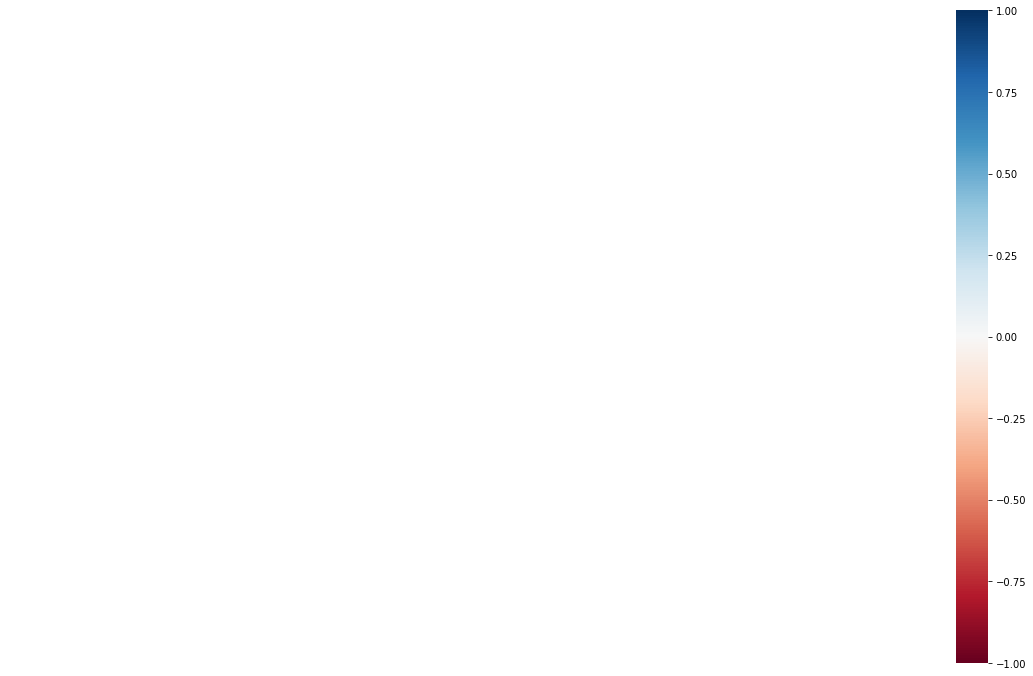

In [40]:
msno.heatmap(dataset)

<AxesSubplot:>

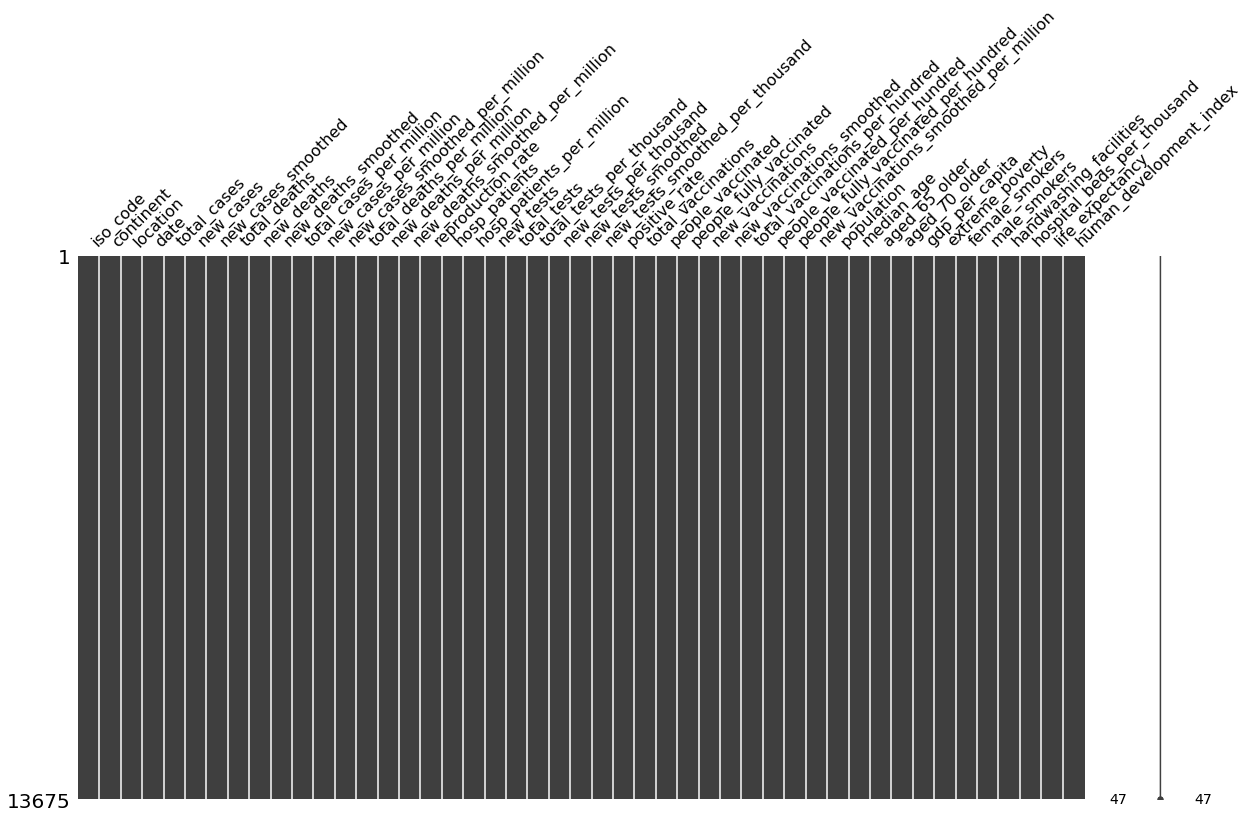

In [41]:
msno.matrix(dataset, figsize=(20, 10))

Agora, vamos converter os atributos categóricos para valores discretos.

In [42]:
from sklearn.preprocessing import LabelEncoder

categoricals = ['continent', 'location', 'iso_code']
for column in categoricals:
    text_label = LabelEncoder()
    num_label = text_label.fit_transform(dataset[column])
    dataset[column + '_lab'] = num_label
dataset['dayofyear'] = dataset['date'].dt.dayofyear
dataset.drop(columns=['continent', 'location', 'date', 'iso_code'], inplace=True)

A etapa anterior garantiu a existência de dados não nulos, mas vamos dar uma olhada em dados negativos agora.

In [43]:
for column in dataset.select_dtypes(include=[np.number]).columns:
    min_value = np.min(dataset[column])
    if min_value < 0:
        num_rows = len(dataset.loc[dataset[column] < 0])
        print(f"Removing {num_rows} rows in {column} because this lines have a value less than 0.")
        dataset.drop(dataset.loc[dataset[column] < 0].index, inplace=True)
dataset.reset_index(drop=True, inplace=True)

Removing 9 rows in new_cases because this lines have a value less than 0.
Removing 4 rows in new_cases_smoothed because this lines have a value less than 0.
Removing 23 rows in new_deaths because this lines have a value less than 0.
Removing 13 rows in new_deaths_smoothed because this lines have a value less than 0.


Apenas garantindo que não exista nenhum valor estranho nas colunas numéricas.

In [44]:
for column in dataset.select_dtypes(include=[np.number]).columns:
    min_value = np.min(dataset[column])
    max_value = np.max(dataset[column])
    print(f"Column {column} have a min value of {min_value} and max value of {max_value}")

Column total_cases have a min value of 533.0 and max value of 40955201.0
Column new_cases have a min value of 0.0 and max value of 414188.0
Column new_cases_smoothed have a min value of 0.0 and max value of 391232.0
Column total_deaths have a min value of 1.0 and max value of 659970.0
Column new_deaths have a min value of 0.0 and max value of 7374.0
Column new_deaths_smoothed have a min value of 0.0 and max value of 4190.0
Column total_cases_per_million have a min value of 38.872 and max value of 156806.629
Column new_cases_per_million have a min value of 0.0 and max value of 3605.46
Column new_cases_smoothed_per_million have a min value of 0.0 and max value of 2996.053
Column total_deaths_per_million have a min value of 0.114 and max value of 3121.911
Column new_deaths_per_million have a min value of 0.0 and max value of 47.496
Column new_deaths_smoothed_per_million have a min value of 0.0 and max value of 28.605
Column reproduction_rate have a min value of 0.2 and max value of 3.68
C

Aqui, decidi que minha análise irá usar consistir em tentar prever novos casos, o que torna o atributo *new_cases* minha variável-alvo.

Assim sendo, irei remover os atributos que não possuem forte correlação com essa variável-alvo'.

In [45]:
all_columns = dataset.select_dtypes(include=[np.number]).columns.to_list()
target_varible = 'new_cases'
filtered_columns = [x for x in all_columns if x != target_varible]
low_correlation = dict.fromkeys(filtered_columns, 0)

In [46]:
for correlation in filtered_columns:
    corr = dataset[target_varible].corr(dataset[correlation])
    print(f"Correlation between columns {target_varible} and {correlation} is {corr}")
    if corr < 0.3:
        low_correlation[correlation] += 1

Correlation between columns new_cases and total_cases is 0.6107922888701719
Correlation between columns new_cases and new_cases_smoothed is 0.9695176375057454
Correlation between columns new_cases and total_deaths is 0.5437548098053253
Correlation between columns new_cases and new_deaths is 0.8181441685485993
Correlation between columns new_cases and new_deaths_smoothed is 0.8036458945174618
Correlation between columns new_cases and total_cases_per_million is -0.015932845699699636
Correlation between columns new_cases and new_cases_per_million is 0.16706762074633513
Correlation between columns new_cases and new_cases_smoothed_per_million is 0.14214228003582555
Correlation between columns new_cases and total_deaths_per_million is 0.007596156550320456
Correlation between columns new_cases and new_deaths_per_million is 0.10567880921884419
Correlation between columns new_cases and new_deaths_smoothed_per_million is 0.09175283929578333
Correlation between columns new_cases and reproduction_

In [47]:
low_correlation

{'total_cases': 0,
 'new_cases_smoothed': 0,
 'total_deaths': 0,
 'new_deaths': 0,
 'new_deaths_smoothed': 0,
 'total_cases_per_million': 1,
 'new_cases_per_million': 1,
 'new_cases_smoothed_per_million': 1,
 'total_deaths_per_million': 1,
 'new_deaths_per_million': 1,
 'new_deaths_smoothed_per_million': 1,
 'reproduction_rate': 1,
 'hosp_patients': 0,
 'hosp_patients_per_million': 1,
 'new_tests': 0,
 'total_tests': 0,
 'total_tests_per_thousand': 1,
 'new_tests_per_thousand': 1,
 'new_tests_smoothed': 0,
 'new_tests_smoothed_per_thousand': 1,
 'positive_rate': 1,
 'total_vaccinations': 0,
 'people_vaccinated': 0,
 'people_fully_vaccinated': 0,
 'new_vaccinations': 0,
 'new_vaccinations_smoothed': 0,
 'total_vaccinations_per_hundred': 1,
 'people_vaccinated_per_hundred': 1,
 'people_fully_vaccinated_per_hundred': 1,
 'new_vaccinations_smoothed_per_million': 1,
 'population': 0,
 'median_age': 1,
 'aged_65_older': 1,
 'aged_70_older': 1,
 'gdp_per_capita': 1,
 'extreme_poverty': 0,
 'f

Aqui temos um fato curioso, onde os atributos *positive_rate*, *median_age*, *aged_65_older*, *aged_70_older*, *gdp_per_capita*, *female_smokers*, *male_smokers*, *handwashing_facilities*, *life_expectancy* e *human_development_index* não possuem uma forte correlação com as possíveis variáveis-alvo. Portanto, vamos remover esses atributos.

In [48]:
keys = [key for key, value in low_correlation.items() if value == 1]
dataset.drop(keys, inplace=True, axis=1)
dataset.reset_index(drop=True, inplace=True)

<AxesSubplot:>

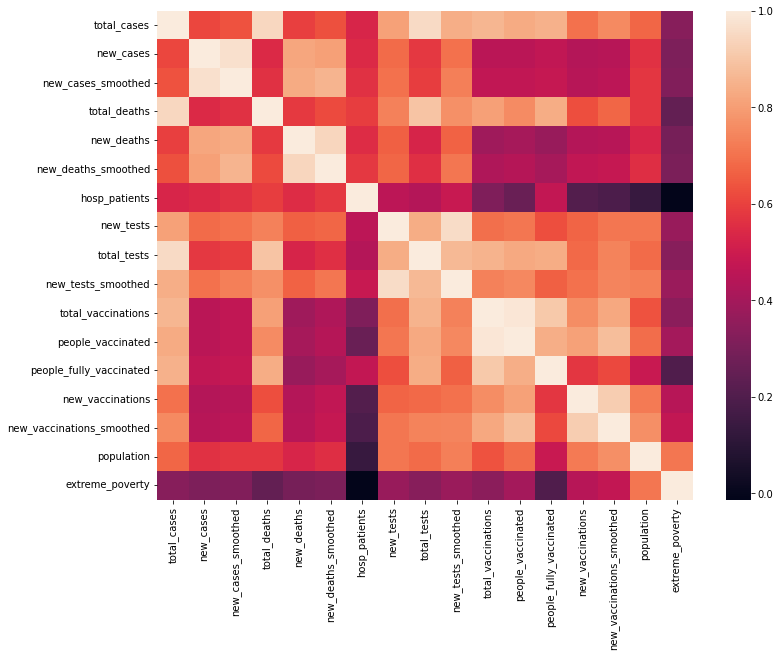

In [49]:
plt.figure(figsize=(12, 9))
sns.heatmap(dataset.corr(), annot=False)

In [50]:
dataset.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,hosp_patients,new_tests,total_tests,new_tests_smoothed,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,population,extreme_poverty
total_cases,1.000000,0.610792,0.632110,0.947185,0.594616,0.631174,0.529319,0.809175,0.954475,0.841577,0.859699,0.831378,0.848902,0.698033,0.751303,0.674990,0.331661
new_cases,0.610792,1.000000,0.969518,0.543755,0.818144,0.803646,0.540773,0.685717,0.577303,0.698501,0.451163,0.450834,0.467151,0.435877,0.445423,0.562836,0.310655
new_cases_smoothed,0.632110,0.969518,1.000000,0.561386,0.831902,0.855970,0.560845,0.698982,0.591594,0.727469,0.466664,0.467351,0.478001,0.444021,0.456605,0.575690,0.316943
total_deaths,0.947185,0.543755,0.561386,1.000000,0.581231,0.618519,0.589571,0.734632,0.895387,0.767989,0.801988,0.757721,0.835911,0.626313,0.673587,0.573138,0.247075
new_deaths,0.594616,0.818144,0.831902,0.581231,1.000000,0.944173,0.549811,0.661009,0.528210,0.665602,0.388352,0.404599,0.371176,0.436142,0.443383,0.529094,0.291787
new_deaths_smoothed,0.631174,0.803646,0.855970,0.618519,0.944173,1.000000,0.579435,0.672411,0.558681,0.708002,0.424284,0.440527,0.402549,0.467130,0.477344,0.556370,0.304085
hosp_patients,0.529319,0.540773,0.560845,0.589571,0.549811,0.579435,1.000000,0.454486,0.437222,0.484652,0.312490,0.262965,0.470506,0.206523,0.189062,0.133525,-0.013850
new_tests,0.809175,0.685717,0.698982,0.734632,0.661009,0.672411,0.454486,1.000000,0.837456,0.960135,0.693281,0.709979,0.623998,0.668592,0.710366,0.710655,0.372627
total_tests,0.954475,0.577303,0.591594,0.895387,0.528210,0.558681,0.437222,0.837456,1.000000,0.868278,0.852799,0.825922,0.837496,0.682471,0.735430,0.686910,0.331500
new_tests_smoothed,0.841577,0.698501,0.727469,0.767989,0.665602,0.708002,0.484652,0.960135,0.868278,1.000000,0.731867,0.746688,0.662651,0.695690,0.739407,0.728611,0.376340


In [51]:
dataset.dtypes

total_cases                  float64
new_cases                    float64
new_cases_smoothed           float64
total_deaths                 float64
new_deaths                   float64
new_deaths_smoothed          float64
hosp_patients                float64
new_tests                    float64
total_tests                  float64
new_tests_smoothed           float64
total_vaccinations           float64
people_vaccinated            float64
people_fully_vaccinated      float64
new_vaccinations             float64
new_vaccinations_smoothed    float64
population                   float64
extreme_poverty              float64
dtype: object

In [52]:
dataset.reset_index(drop=True, inplace=True)
dataset.shape

(13626, 17)

Finalmente, vamos salvar o resultado em um arquivo para usar no modelo.

In [53]:
dataset.to_csv('process.csv', index=False)